In [1]:
# This jupyter notebook is to view the images from dataloader to check if the we get the correct implementation

In [2]:
import numpy as np
import pandas as pd
import torch
import torchvision
from dataset import CIFAR10

In [3]:
from torch.utils.data import DataLoader
from torchvision import transforms

In [4]:
import matplotlib.pyplot as plt

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
index2label = {
    0: "Airplane",
    1: "Automobile",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck"
}

In [36]:
### for valid imgs ###
valid_set = CIFAR10(data_path="./processed_data", dataset="valid", data_aug=False)
# build the data loader
valid_loader = DataLoader(valid_set, batch_size=5, shuffle=False)

In [37]:
# get the data
valid_img, valid_label = next(iter(valid_loader))
print(valid_img.shape, valid_label.shape)

torch.Size([5, 3, 32, 32]) torch.Size([5])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bird


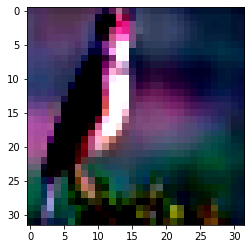

In [38]:
# view the image
print(index2label[valid_label[0].item()])
plt.imshow(valid_img[0].permute(1, 2, 0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


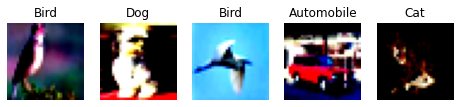

In [39]:
# view a batch of images
batch_size = 5
figure = plt.figure(figsize=(8, 8))
for i in range(batch_size):
    figure.add_subplot(batch_size//5, 5, 1+i)
    plt.title(index2label[valid_label[i].item()])
    plt.axis("off")
    plt.imshow(valid_img[i].permute(1,2,0))

In [40]:
### for train imgs ###
train_set = CIFAR10(data_path="./processed_data", dataset="train", data_aug=True)
# build the data loader
train_loader = DataLoader(train_set, batch_size=5, shuffle=True)

In [41]:
len(train_loader), len(train_set)

(9000, 45000)

In [42]:
# get the data
train_img, train_label = next(iter(train_loader))
print(train_img.shape, train_label.shape)

torch.Size([5, 10, 3, 32, 32]) torch.Size([5])


In [43]:
# convert the dimension from 5d into 4d
bs, ncrops, c, h, w = train_img.size()
train_img = train_img.view(-1, c, h, w)
train_label = torch.repeat_interleave(train_label, 10)

In [44]:
print(train_img.shape, train_label.shape)

torch.Size([50, 3, 32, 32]) torch.Size([50])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

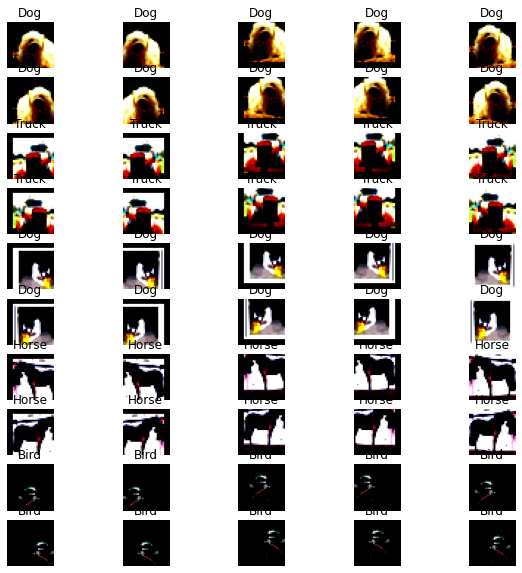

In [45]:
figure = plt.figure(figsize=(10, 10))
for i in range(50):
    figure.add_subplot(10, 5, 1+i)
    plt.title(index2label[train_label[i].item()])
    plt.axis("off")
    plt.imshow(train_img[i].permute(1,2,0))